[![Open In Colab](./images/colab-badge.png)](https://colab.research.google.com/github/abrsvn/pyactr-book/blob/master/notebooks/31_base_activation.ipynb)

In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import numpy as np

## The base activation equation

The ACT-R base activation equation below directly reflects the power law of forgetting:

- ACT-R base activation: $\boxed{B_{i} = \log \left( \sum\limits_{k=1}^{n} t_{k}^{-d} \right)}$.
- Equivalently (exponentiating both sides): $e^{B_{i}} = \sum\limits_{k=1}^{n} t_{k}^{-d} = t_{1}^{-d} + t_{2}^{-d} + \dots + t_{n}^{-d}$

- the base activation $B_{i}$ of a chunk $i$ in declarative memory is a log-transformed measure of performance.
- the actual measure of performance is $e^{B_{i}}$, and $e^{B_{i}}$ is a power function of the times $t_{k}$ since the chunk was presented
- 'presentation' in ACT-R really means two things:
    - the chunk was created for the first time, for example, because the human (or the model) was confronted with a new fact
    - the chunk was re-created; re-creating most often happens when the human (or the model) correctly recalls a chunk, after which the chunk is stored again in memory

Memory-related performance $e^{B_{i}}$ on a specific chunk $i$ at a specific time of retrieval from memory $t_{\textit{now}}$ is:
- the sum of $t_{k}^{-d}$
    - for all $k$ presentations of the chunk, where $k$ varies from $1$ to the total number of chunk presentations $n$
- for each presentation $k$, $t_{k}$ is the period of time elapsed between the time of presentation $k$ and the time of retrieval $t_{\textit{now}}$
    - that is, $t_{k}$ the same as the _delay_ variable in the Ebbinghaus data
- the negative exponent $-d$ (decay) is the equivalent of the $-\beta$ slope parameter in our log-log (power-law) model of the Ebbinghaus data

The basic intuition behind the base activation equation above is that

> ''at any point in time, memories vary in how likely they are to be needed and the memory system tries to make available those memories that are most likely to be useful. The memory system can use the past history of use of a memory to estimate whether the memory is likely to be needed now. This view sees human memory in some sense as making a statistical inference. However, it does not imply that memory is explicitly engaged in statistical computations. Rather, the claim is that whatever memory is doing parallels a correct statistical inference.'' (Anderson and Schooler 1991, p. 400)

What memory is inferring is _activation_, which reflects ''need probability'':

- the probability that we will need a particular chunk now

The basic assumption, already developed in Anderson 1990 (_The adaptive character of thought_. Hillsdale, NJ: Lawrence Erlbaum Associates), is that:

- chunks (facts in the declarative memory) are considered in order of their need probabilities
- until the need probability of a chunk is so low that it is not worth trying to retrieve that chunk anymore
    - i.e., the chunk's activation is below a retrieval threshold
    
This description of what declarative memory does when it retrieves a chunks is serial, but the actual retrieval process is actually formalized as a **parallel process** in which chunks are simultaneously accessed and the one with the highest activation is retrieved (if the activation exceeds the threshold).

This theory of declarative memory derives specific predictions about the relationship between:

- activation, which is an unobserved quantity reflecting need probability
- observable / measurable quantities:
    - recall latency (how long retrieving a fact takes)
    - recall accuracy (what is the probability of a successful retrieval)

The key to understanding the connection between activation on one hand, and recall latency and accuracy on the other hand, is to understand the specific way in which activation reflects need probability:

- Activation $B_{i}$ is the logit (log-odds) transformation of need probability:
    - $B_{i} = \log(o_{i})$
- thus, exponentiated activation $e^{B_{i}}$, which is the actual measure of performance, is the need-odds $o_i$ of chunk $i$:
    - $\boxed{e^{B_{i}}\mbox{ is the odds that chunk }i\mbox{ is needed}}$
    - recall that odds are a deterministic function of probability: $o_i = \frac{p_i}{1-p_i}$
        - where $p_i$ is the 'need probability' of chunk $i$, i.e., the probability that chunk $i$ is needed at the retrieval time $t_{\textit{now}}$

Summarizing, the base-level activation equation says that:

- exponentiated activation $e^{B_{i}}$, which encodes the 'need odds' of chunk $i$ (the odds that chunk $i$ is needed at the time of retrieval $t_{\textit{now}}$), is a power function of time
- this power function has two components, $\sum\limits_{k=1}^{n}$ and $t_{k}^{-d}$, which formalize the following:
    - $\sum\limits_{k=1}^{n}$: individual presentations $1$ through $n$ of a chunk $i$ have a strengthening impact on the need odds of chunk $i$
        - a presentation $k$ additively increases the previous need odds for chunk $i$
        - these impacts are summed up to produce a total strength / total need odds for chunk $i$;
    - $t_{k}^{-d}$: the strengthening impact of a presentation $k$ on the total need odds for chunk $i$ is a power function of time $t_{k}^{-d}$, where $t_{k}$ is the time elapsed since presentation $k$
        - that is, $t_{k}$ is the delay: the period of time elapsed between the time of presentation $k$ and the time of retrieval $t_{now}$
        - raising the delay $t_{k}$ to the $-d$ power (the decay) produces the power law of forgetting

The parameter $d$ in the base activation equation is usually set to $\frac{1}{2}$, so the equation simplifies to:

- Base-level learning equation (simplified: $d=0.5$): $B_{i} = \log \left( \sum\limits_{k=1}^{n} t_{k}^{-\frac{1}{2}} \right) = \log \left( \sum\limits_{k=1}^{n} \frac{1}{\sqrt{t_k}} \right)$

## An example

Let's work through an example. Assume we have the following chunk of type ```word``` in declarative memory, repeated from the first model (the 'agreement' model) we discussed:

![Car chunk in graph form](figures/car_graph.jpg)

![Car chunk in avm form](figures/car_avm.jpg)

Assume this chunk is presented $5$ times, once every $1.25$ s, starting at time $0$ s. We want to plot its base-level activation for the first $10$ s.

Below, we define a ```base_activation``` function. Its inputs are:

- the vector of presentation times for the chunk: ```pres_times```, the first argument of the function
- the vector consisting of the moments of time at which to obtain activation: ```moments```, the second argument of the function
    - you can think of these ```moments``` of time as potential retrieval times

The output of the ```base_activation``` function is the vector ```base_act``` of base-activation values at the corresponding ```moments``` of time.

In [2]:
def base_activation(pres_times, moments):
    base_act = np.zeros(len(moments))
    for idx in range(len(moments)):
        past_pres_times = pres_times[pres_times<moments[idx]]
        base_act[idx] = \
            np.sum(1/np.sqrt(moments[idx] - past_pres_times))
    non_zero_activations = np.not_equal(base_act, 0)
    base_act[non_zero_activations] = \
        np.log(base_act[np.not_equal(base_act, 0)])
    
    return base_act

- line 2: we initialize the base activation ```base_act```: we set it to be a long vector of $0$s, as long as the number of moments we want to compute the activation for
- line 3: the ```for``` loop on lines 3-6 computes the actual activation: for every point ```idx``` (short for `index') at which we want to compute the activation, we do several things, discussed below;
- line 4: we identify the moment in time at which we should compute the activation, namely ```moments[idx]```; we identify the presentation times that precede this moment, namely ```pres_times<moments[idx]```, since they are the only presentations contributing to base activation at this moment in time; we retrieve these presentation times and store them in the variable ```past_pres_times```;
- lines 5-6: with these past presentation times in hand, we compute base level activation following the base level equation; first, we compute the time intervals since those past presentations: ```moments[idx] - past_pres_times```; then we take the square root of these intervals ```np.sqrt(...)``` and then, the reciprocal of those square roots ```1/np.sqrt(...)```; finally, we sum all those reciprocals ```np.sum(...)```;
- lines 7-9: now, the vector ```base_act``` stores exponentiated activations; to get to the actual activations, we need to take the log of the quantities currently stored in ```base_act```; since $\log(0)$ is undefined, we identify the non-$0$ quantities in ```base_act``` (line 7), take the log of those quantities and replace them with their logs (lines 8-9).

Let's generate a vector of 5 presentation times evenly spaced between $0$ and $5000$ ms.
- as shown below, these presentation times are at $0$ s, $1.25$ s, $2.5$ s, $3.75$ s and $5$ s.

In [3]:
pres_times = np.linspace(0, 5000, 5)/1000
pres_times

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

We generate a vector of the moments in time at which we want to compute the activation:

- we want to see the ebbs and flows of activation for the first ten seconds
- we want to see this every ms
- so we generate a vector with $10000$ numbers, from $1$ to $10000$ ms

In [4]:
moments = np.arange(10000)/1000
moments

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.997e+00, 9.998e+00,
       9.999e+00])

Finally, we compute the base activation relative to these moments and presentation times using our ```base_activation``` function:

In [5]:
base_act = base_activation(pres_times, moments)
base_act

array([0.        , 3.45387764, 3.10730405, ..., 0.62436509, 0.6242921 ,
       0.62421912])

We can now plot the result: the code for the plot is provided below, as well as the resulting plot:

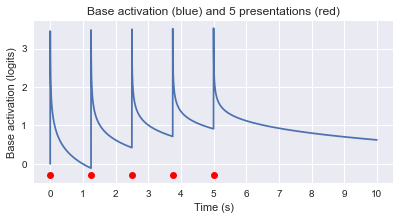

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(5.5, 3)
ax.plot(moments, base_act, linestyle='-')
ax.plot(pres_times, np.ones(5) * -0.3, 'ro')
ax.set_title('Base activation (blue) and 5 presentations (red)')
ax.set_xlabel('Time (s)')
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.set_ylabel('Base activation (logits)')
#plt.xticks(rotation=45)
plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=0.7)

- the activation of the chunk spikes after each presentation and then drops as a power function of time until the next presentation / spike
- the maximum activation (the height of the spikes) slowly increases with each presentation, just as the decay of activation becomes more and more mild
- after the fifth presentation, the activation of the chunk decreases pretty slowly
- even in the long term (at $10$ s), its activation is higher than the activation it had shortly after the first presentation (e.g., at $500$ ms)
- thus, after repeated presentations, we can say that the chunk has been retained in 'long-term' memory

The base action figure shows is that forgetting + rehearsal is an essential part of remembering.

- the model captures the common observation that cramming for an exam never works long term
- the activation of the newly learned facts decreases very steeply after the first presentation
- in constrast, properly spaced rehearsals or practice lead to long-term retention

To conclude this notebook, note that ACT-R does not distinguish between short-term and long-term memory.

Both of them are distinct from working memory, or focus of attention if you will, which can be thought as the state of the buffers at any given time.

Modeling memory as a power-function of time generates the proper short-term memory behavior (after one presentation), as well the proper long-term memory behavior (after a series of presentations).